In [12]:
import os
import sys
import h5py
import numpy as np
import geopandas as geopd
import matplotlib.pyplot as plt


DIR_REPO = "/".join(os.getcwd().split("/")[:-1])
DIR_LIB = f"{DIR_REPO}/lib"
sys.path.append(DIR_LIB)

import GOES

PATH_SHP = f"{DIR_REPO}/Recursos/Shapefiles/shape_file.shp"
PATH_ALT = f"{DIR_REPO}/Recursos/CONUS/Altitud_CONUS_2km.h5"
PATH_CRD = f"{DIR_REPO}/Recursos/CONUS/Lat_Lon_CONUS_2km.h5"

# Abrimos array de altura.
with h5py.File(PATH_ALT,"r") as file:
    ALT = file["Altura"][:]

# Abirmos array de coordenadas
with h5py.File(PATH_CRD,"r") as file:
    LAT = file["lats"][:]
    LON = file["lons"][:]

# Abrimos geopandas
geodf = geopd.read_file(PATH_SHP)

# Recortamos
latitud , longitud , ventana = 21,-100.5 ,80
px,py = GOES.coordenadas2px(2,latitud,longitud)

#alt = GOES.obtener_ventana(ALT,px,py,ventana=ventana)
#lat = GOES.obtener_ventana(LAT,px,py,ventana=ventana)
#lon = GOES.obtener_ventana(LON,px,py,ventana=ventana)

alt = ALT[1108:1293,464:649]
lat = LAT[1108:1293,464:649]
lon = LON[1108:1293,464:649]

In [13]:
localizaciones = {
    "Querétaro":(-100.40,20.603),
    "San Juan del Rio":(-99.98,20.386),
    "Bernal":(-99.940,20.743),
    "Cadereyta":(-99.816,20.695),
    "Jalpan":(-99.472,21.218),
    "Pinal de Amoles":(-99.627,21.135),
    "San Joaquin":(-99.565,20.916),
    "Amealco":(-100.144,20.187),
    "Huimilpan":(-100.274,20.374),
    
    "León":(-101.66,21.120),
    "Guanajuato":(-101.260,21.021),
    "Irapuato":(-101.33,20.68),
    "Celaya":(-100.819,20.534),
    "Moroleon":(-101.181,20.135),
    "Comonfort":(-100.759,20.718),
    "Dolores Hidalgo":(-100.93,21.159),
    "Salvatierra":(-100.879,20.210),
    "Pénjamo":(-101.722,20.429),
    "San Luis de la Paz":(-100.515,21.298),
    "Coroneo":(-100.366,20.200),
    "Acambaro":(-100.719,20.031),
    
    "Ixmiquilpan":(-99.216,20.487),
    "Tecozautla":(-99.634,20.536),
    "Huichapan":(-99.650,20.375),
    
    
    "Rio Verde":(-99.998,21.937),
    
    "Lagos de Moreno":(-101.926,21.358),
}

lat_lug = []
lon_lug = []
lugares = []
for key,coord in localizaciones.items():
    lugares.append(key)
    lon_lug.append(coord[0])
    lat_lug.append(coord[1])

Text(1.0, 1.0, 'Proyecto Deep-GOES')

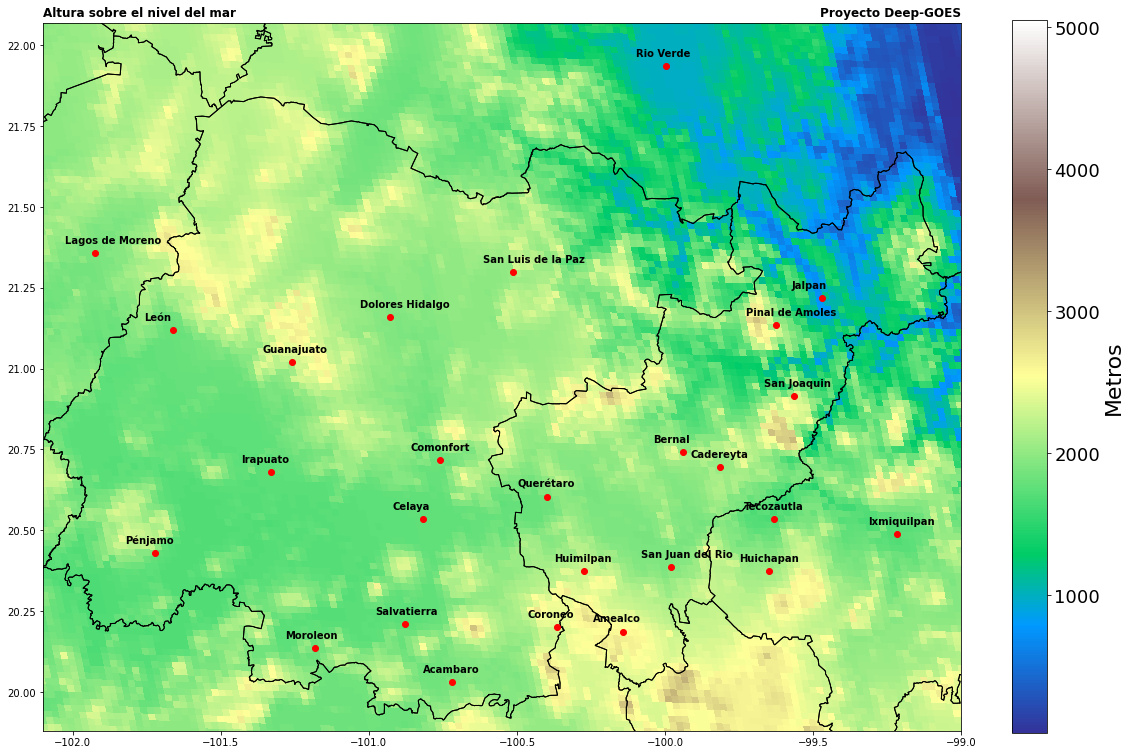

In [15]:
fig , ax = plt.subplots(1,figsize=(18,18))

# Ploteamos array altura.
colorplot = ax.pcolor(lon,lat,alt,shading="nearest",cmap="terrain")

# Ploteamos divición
geodf.plot(ax=ax,facecolor="none")

# Ploteamos scatter
ax.scatter(lon_lug,lat_lug,c="red")

# Anotamos labels
for i, txt in enumerate(lugares):
    ax.annotate(txt, (lon_lug[i]-0.10, lat_lug[i]+0.03),weight="bold")

# Límites del plot
ax.set_xlim(-102.1,-99)
ax.set_ylim(19.88,22.07)

cbar = plt.colorbar(colorplot,fraction=0.0355)
cbar.set_label("Metros", fontsize=22)
cbar.ax.tick_params(labelsize=18)

ax.set_title("Altura sobre el nivel del mar",loc="left",weight="bold")
ax.set_title("Proyecto Deep-GOES",loc="right",weight="bold")
